In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

pd.set_option('display.max_colwidth', 100)

In [3]:
# Reselection and selection piechart of readnumbers (top10 + others)

In [4]:
def prepDataset(f):
    df = pd.read_csv(f, sep='\t', names=['count', 'seq'])
    df['label'] = [str(x+1) if x < 10 else 'other' for x in range(0, len(df))]
    return df

In [5]:
selection_dataset = '/home/kurfurst/Documents/datasets/MV_NPP_full_FAcounts.tsv'
reselection_dataset = '/home/kurfurst/Documents/datasets/MV_apollon_reselection.tsv'

In [6]:
df_sel = prepDataset(selection_dataset)
df_res = prepDataset(reselection_dataset)

---
### Selection data

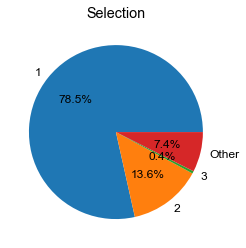

In [39]:
topN = 3

labels = df_sel.iloc[0:topN]['label'].tolist() + ['Other']
sizes = df_sel.iloc[0:topN]['count'].tolist() + [df_sel.iloc[topN:]['count'].sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Selection')
plt.savefig('Selection_sequence_abundance_piechart.svg')

---
### Reselection data

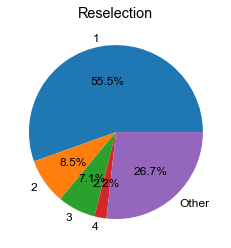

In [40]:
topN = 4

labels = df_res.iloc[0:topN]['label'].tolist() + ['Other']
sizes = df_res.iloc[0:topN]['count'].tolist() + [df_res.iloc[topN:]['count'].sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Reselection')
plt.savefig('Reselection_sequence_abundance_piechart.svg')

---
### Comparison

In [13]:
del df_sel['label']
del df_res['label']

In [14]:
pd.DataFrame({
    'Selection' : [df_sel['count'].sum(), len(df_sel), df_sel.iloc[0]['count']],
    'Reselection' : [df_res['count'].sum(), len(df_res), df_res.iloc[0]['count']]
}, index=['Reads total', 'Unique sequences', 'Max. count'])

,Selection,Reselection
Reads total,4393681,5657508
Unique sequences,15828,34493
Max. count,3448950,3137978


In [18]:
df_sel.head(10)

,count,seq
0,3448950,GGCAGAGACGGCGGCGTCATAGGGACAGTGCTGTACATGCTCACCCTCAGGGGCAATCGGGGGGCGTGAACTTATATGGAGTTAC
1,598238,GGCAGAGATGGCAACGTCAACATGAGGATGCCGCATATCCCCAGTGCACACTTGGGCAGTGGGGAGTGACTTGGGATGGGGGAAA
2,19589,GGAAGATGAGGCTACAACTCAGCGCCCATACGGTATATACTAATTGCTCAAGGTCATATGAGATACTGGCTTCCGCTATCGCATA
3,18558,GGTAGACATGGCAACGCCACTGTCACTAAACTGAGCGTGATCAGTAAGCATGCTCATAGGTGAGGGTGTTTTTGGGTGGCTGGTA
4,14385,GGTAGGGATGAGGATGAGAATGGGCGGACGCGGAATAACCTCATGGCGCATCGACGAGGGGGGGAGGCACTAGGGAATAACAGTC
5,10932,GGCAGAGACGGCGGCGTCATAGGGACAGTGCTGTACATGCTCACCCTCAGGGGCAATCGGGGGGCGTGAACTTATATGGAGTTAT
6,9394,GGAAGATATGGCGCGAACAAATGGACAATGCCGAATATCCCCCGCACGCAGGGCAACAAGGGGGAGTGACTTGGGATGGGGGCTG
7,8664,GGGAGCCATGGCGACTACAACTGAACGAGTCCGTGGCAGCGGTGTCTGCAGGGCTGCAGGGGCGATTGACTTTGCTTGGGTGGTA
8,8631,GGGAGCCATGGCGACAACACCTGAACGATTATGAATGTCCTTTGTTCGGAGGGGCACTGGGTGGACTCACCTGCACCGGGGGTGA
9,8048,GGAAGAGTAGTTACAGACACAGGGAAGTTGCTGCATATCCTCCCTGTGCAGGGCCGCAGGGGGGAGTGACTTGGGATGGGGGGTC


In [19]:
df_res.head(10)

,count,seq
0,3137978,GGCAGAGATGGCGCTGTCATAGGGACAGTGCTACGCATGCTCACCCTCTGGGGCAATCGGGGGGCTTCGACTTGTATAGAGTTAG
1,480794,GGCAGAGATGGCGGTGTCATGTTGACAGTGCATTGCATGCTCCCCCTCAGGGGCAATCGGGGGGTGAGAGCTAGTATGGAGTTAA
2,399558,GGCAGAGATGGCGGTGTCATAGGTACACTGCTATGCATGCTCACCCTCTGGGGCAATCGGGGGGCATTAACATATATTGATTTAC
3,126714,GGCAGAGACGGCGGCGTCCTAGGGACAGTGCTGTACATGCTCCCCCTCAGGGGCAATCGGGGGGTGTAAACTGCGATGTTATTAG
4,86025,GGCAGAGACAGCGACGGGATATAAACAGTTCTGTACATGCTCACCCTCTGGGGCAATCGGGGGGCTTAAAGGCTTAGGGAGTTAG
5,76172,GGCAGAGATGGCGGCGTCATATGGAGGCCGCTATGCATGCTCCCCCTCAGGGGCAATCGGGGGGTGTAAACATATAAGGAGTTTG
6,75062,GGCAGAGATGGCGGTGGCATAGTGACAGTGCCGCGCATGCTCACCCTCTGGGGCAATCGGGGGGCGATAACTTATAAGGCGTTAC
7,54043,GGCAGAGACGACAGCGTCATACAGACACTGGTGTGCATGCTCACCCTGGGGGGCAATCGGGGGGCGACAATTTATATAGGCTTAC
8,50860,GGCAGAGATGGCAGCCTCATAGGGATGGTGCCATACATGCTCACCCGGAGGGGCAATCGGGGGGCGATAAAGTATATGGAATTAC
9,50294,GGCAGAGAAGGCGGCGACTTAGCGACCATGCTTCGCATGCTCCCCCTCAGGGGCAATCGGGGGGTGTGAATTTAAAAAGAGATTT
